In [309]:
import pandas as pd
import numpy as np
np.random.seed(0)
from tabulate import tabulate

In [280]:
def classify_sentiment(sentiment):
    ''' Classify sentiment as positive, negative, or neutral based on sentiment score. '''
    if sentiment==None:
        return None
    if sentiment >= 0.05:
        return 1 # positive
    elif sentiment <= -0.05:
        return -1 # negative
    elif sentiment > -0.05 and sentiment < 0.05:
        return 0 # neutral
    
def classify_sentiment_binary(sentiment):
    ''' Classify sentiment as positive or negative based on sentiment score. '''
    if sentiment==None:
        return None
    if sentiment >= 0:
        return 1
    elif sentiment < 0:
        return -1

## Whole-Review Sentiment Evaluation

In [332]:
whole_sent = pd.read_csv("whole_sentiment_output.csv")
original_review_df = pd.read_csv("handmade_reviews_balanced.csv").dropna(subset=['text']) #! need to drop na!
whole_sent['rating'] = original_review_df['rating'] # Get labels as ratings

# Convert sentiment scores to labels
# whole_sent['predicted'] = whole_sent['sentiment'].apply(classify_sentiment) 
# whole_sent['rating'] = whole_sent['rating'].apply(lambda x: 1 if x > 3 else (-1 if x < 3 else 0)) # Convert 5-star rating - positive, negative, neutral

whole_sent['predicted'] = whole_sent['sentiment'].apply(classify_sentiment_binary)
whole_sent['label'] = whole_sent['rating'].apply(lambda x: 1 if x >= 3 else -1) # binary labels: positive, negative

whole_sent

,review,sentiment,predicted,label,rating
0,boyfriend christmas love,0.6369,1,1,5.0
1,extremely pleased purchase,0.4927,1,1,5.0
2,perfect gift golf lover,0.8860,1,1,5.0
3,get christmas gift wife love perfect kitchen u...,0.8957,1,1,5.0
4,great product,0.6249,1,1,5.0
...,...,...,...,...,...
26231,charge product say 925the comfort awful due cl...,-0.1065,-1,-1,2.0
26232,purchase coworker nice time inside include rec...,0.6115,1,-1,2.0
26233,disappoint capitalize first letter name overal...,0.3612,1,-1,2.0
26234,cheaply make carbiner break within couple day ...,0.5106,1,-1,2.0


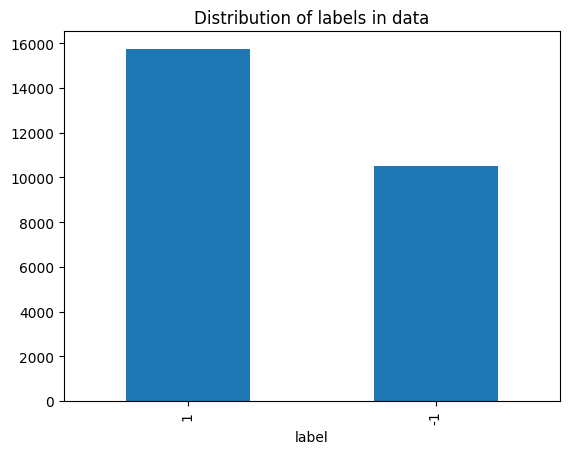

In [249]:
# Plot distribution of labels in data
import matplotlib.pyplot as plt
whole_sent['label'].value_counts().plot(kind='bar')
plt.title('Distribution of labels in data')
plt.show()

In [328]:
# Confusion matrix
def get_stats(predictions_df, pred_col_name='predicted', label_col_name='label'):
    TP = len(predictions_df[(predictions_df[pred_col_name] == 1) & (predictions_df[label_col_name] == 1)])
    TN = len(predictions_df[(predictions_df[pred_col_name] == -1) & (predictions_df[label_col_name] == -1)])
    FP = len(predictions_df[(predictions_df[pred_col_name] == 1) & (predictions_df[label_col_name] == -1)])
    FN = len(predictions_df[(predictions_df[pred_col_name] == -1) & (predictions_df[label_col_name] == 1)])
    print("Confusion Matrix:")
    print("               Predicted Positive   Predicted Negative")
    print("Actual Positive        {:<20}{}".format(TP, FN))
    print("Actual Negative        {:<20}{}".format(FP, TN))
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 =  2 * TP / (2 * TP + FP + FN)
    acc = (TP + TN) / (TP + TN + FP + FN)
    table = [
        ['Precision', round(precision, 3)],
        ['Recall', round(recall, 3)],
        ['F1 Score', round(f1, 3)],
        ['Accuracy', round(acc, 4)]
    ]
    
    # Printing the table
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [333]:
get_stats(whole_sent)

Confusion Matrix:
               Predicted Positive   Predicted Negative
Actual Positive        14874               868
Actual Negative        7793                2701
╒═════════════╤═════════╕
│ Precision   │   0.656 │
╞═════════════╪═════════╡
│ Recall      │  0.945  │
├─────────────┼─────────┤
│ F1 Score    │  0.775  │
├─────────────┼─────────┤
│ Accuracy    │  0.6699 │
╘═════════════╧═════════╛


Closer look at 3-star reviews

18781                               pretty glue front fall
15939    name say izomara engraving great barely readab...
18182    nice little purse letter piece help hold strap...
20303                     mine glue something try get nice
17661                             top piece keep come okay
Name: review, dtype: object

3-star reviews that are predicted as positive: 4637 
	Percentage: 88.29017517136329
3-star reviews that are predicted as negative: 615 
	Percentage: 11.70982482863671


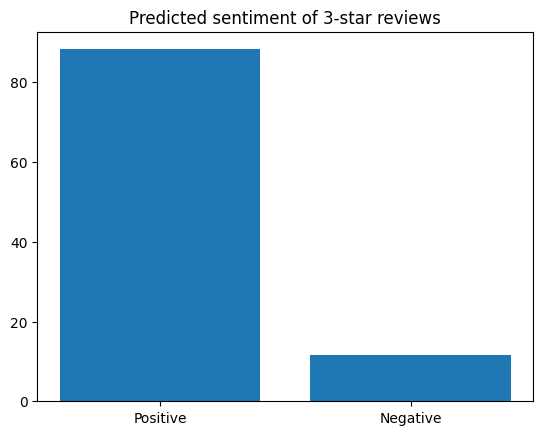

In [334]:
# Closer look at 3-star reviews
three_star = whole_sent[whole_sent['rating'] == 3]
print(three_star['review'].sample(5))
percent_pos = len(three_star[three_star['predicted'] == 1]) / len(three_star) * 100
percent_neg = len(three_star[three_star['predicted'] == -1]) / len(three_star) * 100
print("\n3-star reviews that are predicted as positive:", len(three_star[three_star['predicted'] == 1]), "\n\tPercentage:", percent_pos)
print("3-star reviews that are predicted as negative:", len(three_star[three_star['predicted'] == -1]), "\n\tPercentage:", percent_neg)

plt.bar(['Positive', 'Negative'], [percent_pos, percent_neg])
plt.title('Predicted sentiment of 3-star reviews')
plt.show()

Remove 3-star reviews

In [254]:
# Remove 3-star reviews
whole_sent_no_3 = whole_sent[whole_sent['rating'] != 3]
get_stats(whole_sent_no_3)

TP:  10237
TN:  2701
FP:  7793
FN:  253
Precision:  0.5677759290072102
Recall:  0.9758817921830315
F1 score:  0.717882187938289
Accuracy:  0.6165650019062142


# Targeted Sentiment Evaluation

In [3]:
handmade_reviews_bal = pd.read_csv('handmade_reviews_balanced.csv').drop(columns=['title', 'asin']).dropna(subset=['text'])
handmade_reviews_orig = pd.read_csv('handmade_reviews.csv').drop(columns=['title', 'asin', 'user_id', 'helpful_vote', 'timestamp', 'verified_purchase', 'images']).dropna(subset=['text'])
print(len(handmade_reviews_bal))
print(len(handmade_reviews_orig))
# rename column parent_asin to asin
handmade_reviews_bal.rename(columns={'parent_asin': 'asin'}, inplace=True)
handmade_reviews_bal

26236
161915


,rating,text,asin
0,5.0,boyfriend christmas love,B081TVVM16
1,5.0,extremely pleased purchase,B01CCWR3OO
2,5.0,perfect gift golf lover,B07PC4ZTGB
3,5.0,get christmas gift wife love perfect kitchen u...,B079T97FNX
4,5.0,great product,B01DJJ6IQI
...,...,...,...
26330,2.0,charge product say 925the comfort awful due cl...,B08YK1H88V
26331,2.0,purchase coworker nice time inside include rec...,B0C9FQJS34
26332,2.0,disappoint capitalize first letter name overal...,B01FT98CB0
26333,2.0,cheaply make carbiner break within couple day ...,B083Q2N1KQ


In [70]:
# Sample 20 reviews for manual evaluation, from each star rating
test_reviews = handmade_reviews_bal.groupby('rating').apply(lambda x: x.sample(4), include_groups=False)
for rev in test_reviews['text']:
    # print review row number and rev
    print(rev)
# test_reviews.to_csv('handmade_reviews_balanced_test.csv', index=False)

receive yesterday chain pop cause piece fall money actual piece inscription cute something quality chain listen gut one
specify pair receive one one easily fall ear consider ripoff answer one email
bead center unmovable match center look crooked bummer
understand groom name must list first want sure bride name first write ask company question could sure bride name first respond put bride name blank groom groom name blank bride would assure would correctly carefully guess receive picture expensive version course personalize groom name first disappointed recourse leave also insist date would accept without first two 0s proceed include first two finished picture look weird wrong stuck give granddaughter husband apology beware prospective buyer might get expect hope
small anticipate really see name ingrave
much small appear photo
like print much however buy describe singer sewing co print instead get b clayton print
buy bracelet end april comfortable wear would come loose time morning fall

In [ ]:
# Saving test sample reviews
test_revs_processed = ["receive yesterday chain pop cause piece fall money actual piece inscription cute something quality chain listen gut one",
"specify pair receive one one easily fall ear consider ripoff answer one email",
"bead center unmovable match center look crooked bummer",
"understand groom name must list first want sure bride name first write ask company question could sure bride name first respond put bride name blank groom groom name blank bride would assure would correctly carefully guess receive picture expensive version course personalize groom name first disappointed recourse leave also insist date would accept without first two 0s proceed include first two finished picture look weird wrong stuck give granddaughter husband apology beware prospective buyer might get expect hope",
"small anticipate really see name ingrave",
"much small appear photo",
"like print much however buy describe singer sewing co print instead get b clayton print",
"buy bracelet end april comfortable wear would come loose time morning fall apart lose bead come apart really suck really like bracelet buy another one since last long especially current price",
"polish ok coat start chip 2nd day 4th day really look matte anymore",
"grainy cute",
"pay attention sizing order medium cat way big although worry small size would hard read also order industrial steel quite heavy sure material would light unfortunately put cat exactly return like trinket come",
"love pair send back tiny ear fit great wish information size buy option get pair short length disproportionately tiny ear probably look great",
"expect",
"although apply yet look pretty simple like option well paint entire room far pleased",
"love sign wish sturdy hanging mechanism",
"beautiful expect worth money",
"amazing artwork buy gift well receive love amazon promote small business artist",
"ring beautiful go lot outfits happy purchase",
"would order least",
"search cane master circle master compliance air travel look great would buy one dad"]

In [139]:
# Find the test reviews in review_targ_sentiments with exact match
test_overlap_df = pd.DataFrame(columns=handmade_reviews_bal.columns)
for rev in test_revs_processed:
    test_overlap_df.loc[len(test_overlap_df)] = handmade_reviews_bal[handmade_reviews_bal['text'] == rev].iloc[0]

# Drop rating before displaying
test_overlap_df.drop(columns=['rating'])

,text,asin
0,receive yesterday chain pop cause piece fall m...,B07PGR2G13
1,specify pair receive one one easily fall ear c...,B0721V9WYH
2,bead center unmovable match center look crooke...,B08XXW5NCF
3,understand groom name must list first want sur...,B01DB9BFAK
4,small anticipate really see name ingrave,B01N5SVHUU
5,much small appear photo,B0C574VVJY
6,like print much however buy describe singer se...,B0BMRR2LS2
7,buy bracelet end april comfortable wear would ...,B09FT4MJRM
8,polish ok coat start chip 2nd day 4th day real...,B083QR47NK
9,grainy cute,B0BHJMLN2M


In [ ]:
# Manually searching for original reviews. replace target_asin with the asin to search for, then look through resulting review text to find matching
target_asin = 'B0BMB4QLZR'
matching_asins = handmade_reviews_orig[handmade_reviews_orig['parent_asin'] == target_asin]
for i, item in enumerate(matching_asins['text']):
    print(matching_asins['index'].iloc[i], item)

### ORIGINAL Reviews in test set
- Manually label the features and overall review with a positive (1), negative (-1), or neutral (0) sentiment. List of features was obtained in the below "FEATURE CELL" 

B07PGR2G13. 53428 I just received it yesterday and the chain popped. That caused the piece to fall out, so now I’m out of my money. The actual piece with the inscription was cute but they have to do something about the quality of the chain. I should have listened to me gut on this one.
- quality: -1
- piece: -1
- chain: -1
- money: -1
- fall: not a ft
- one: 0
- cute: not a ft
- OVERALL: -1


B0721V9WYH. 21659 It specified a pair.  I received one.  The one easily falls off the ear.  I consider this a rip-off.  They have not answered one of my emails!
- fall: not a ft
- ear: 0
- one: -1
- pair: 0
- OVERALL: -1 

B08XXW5NCF. 114453 The beads are off center and unmovable so it doesn’t match the center. Looks crooked. Bummer.
- look: -1
- match: -1
- center: 0
- bead: -1
- OVERALL: -1

B01DB9BFAK. 17196 I do not understand why the groom's name MUST be listed first, and wanted to be SURE the bride's name was first, so wrote and asked the company this question--how could I be sure the bride's name was first.  They responded that I should just put the bride's name in the blank for the groom, and the groom's name in the blank for the bride, which would assure that it would be done correctly.  I very carefully did this, but you guessed it- I just received the picture (the most expensive version, $160, of course) and it had been personalized with the groom's name first.  I'm so disappointed, but no recourse left to me. Also, they INSISTED on 0's in the date or would not accept it without those first two 0s:  04-09-2019, and then proceeded to include the first two 0's on the finished picture.  Looks weird and just WRONG, but I'm stuck with it, and will just give it to my granddaughter and husband with apologies, which is not what I should have to do. Beware, any prospective buyer--you might not get what you were expecting and hoping for...
- picture: -1
- name: 0
- look: -1
- company: 0
- husband: 0
- hope: -1
- put: not a ft
- guess: not a ft
- get: not a ft
- date: -1
- granddaughter: -1
- OVERALL: -1

B01N5SVHUU. 118630 Smaller than I anticipated and you can really see the name ingraved
- name: 0
- see: 0
- OVERALL: 0

B0C574VVJY. 153053 Much smaller than appeared on the photo
- photo: 0
- OVERALL: -1

B0BMRR2LS2. 14910 I like the print very much. However, I bought it because it was described as SINGER SEWING Co. print. Instead I got an A. B. Clayton print.
- print: 1
- buy: not a ft
- get: 0
- OVERALL: 1

B09FT4MJRM. 102860 Bought this bracelet at the end of April. Comfortable to wear but would come loose at times. This morning (8/17/22) it just fell apart. I lost a few beads when it came apart. Really sucks because I really like this bracelet. Won't be buying another one since it won't last very long. Especially not at the current price.
- time: not a ft
- price: -1
- bracelet: 1
- wear: 1
- fall: not a ft
- end: not a ft
- buy: not a ft
- one: -1
- bead: 0
- OVERALL: -1

B083QR47NK. 130312 This polish is just OK. After 2 coats it started chipping the 2nd day. And on the 4th day it really doesn't look matte anymore.
- day: 0
- look: -1
- start: not a ft
- OVERALL: -1

B0BHJMLN2M. 67870 just grainy but it’s cute
- cute: not a ft
- OVERALL: 1 

B09GK2JJDZ. 2517 I should've paid more attention to the sizing because I ordered a medium for our cat which is WAY too big. Although I worry that a smaller size would be hard to read. Also I ordered the industrial steel and it's quite heavy. I'm not sure if the other materials would be lighter. Unfortunately we won't be putting this on our cat and can't exactly return it. I did like the other trinkets that came with it.
- order: not a ft
- size: -1
- way: not a ft
- return: not a ft
- material: 0
- pay: not a ft
- read: -1
- OVERALL: -1

B01NAYBY1S. 153363 I love this pair and I didn't send them back, but I have tiny ears so they don't fit great. I wish there was more information about their size when buying them, or that there were options to get a pair that was shorter in length. If you don't have disproportionately tiny ears, they'll probably look great on you.
- size: -1
- look: 1
- ear: 0
- buy: not a ft
- wish: 0
- option: 0
- fit: -1
- pair: 1
- get: not a ft
- length: 0
- OVERALL: 1 ? mixed

B0BZCYRMC1. 88344 Just as expected
- OVERALL: 1 or 0

B07M7PFZXV. 80129 Although I haven’t applied them yet it looks pretty simple. I like this option better than painting my entire room. So far I’m pleased!
- look: 1
- paint: not a ft
- room: 0
- option: 1
- OVERALL: 1

B0B4ZSS22X. 123655 Love the sign. I just wish it had a more sturdy hanging mechanism.
- sign: 1
- wish: not a ft
- OVERALL: 1

B0C4VWNDMT. 99411 Beautiful, but no where what I expected.  Not, worth the money.
- money: -1
- OVERALL: -1 ? mixed

B01N4GETO3. 83565 Amazing artwork! Bought this as a gift and it was very well received. Love that Amazon is promoting smaller businesses and artists!
- gift: 1
- buy: not a ft
- amazon: 1
- OVERALL: 1

B0C579H3HP. 157944 The ring is beautiful and goes with a lot of outfits. Very happy with my purchase
- ring: 1
- purchase: 1
- lot: not a ft
- go: not a ft
- OVERALL: 1

B076QHLC45. 4719 Would order at least 2 more
- order: not a ft
- OVERALL: 1

B0BMB4QLZR. 107603 Search cane master circle of masters for compliance for air travel. Looks great, I would buy one if I didn't have my dad's.
- look: 1
- buy: not a ft
- one: 1
- OVERALL: 1

B07PGR2G13. I just received it yesterday and the chain popped. That caused the piece to fall out, so now I’m out of my money. The actual piece with the inscription was cute but they have to do something about the quality of the chain. I should have listened to me gut on this one.

B0721V9WYH. It specified a pair.  I received one.  The one easily falls off the ear.  I consider this a rip-off.  They have not answered one of my emails!

B08XXW5NCF. The beads are off center and unmovable so it doesn’t match the center. Looks crooked. Bummer.

B01DB9BFAK. I do not understand why the groom's name MUST be listed first, and wanted to be SURE the bride's name was first, so wrote and asked the company this question--how could I be sure the bride's name was first.  They responded that I should just put the bride's name in the blank for the groom, and the groom's name in the blank for the bride, which would assure that it would be done correctly.  I very carefully did this, but you guessed it- I just received the picture (the most expensive version, $160, of course) and it had been personalized with the groom's name first.  I'm so disappointed, but no recourse left to me. Also, they INSISTED on 0's in the date or would not accept it without those first two 0s:  04-09-2019, and then proceeded to include the first two 0's on the finished picture.  Looks weird and just WRONG, but I'm stuck with it, and will just give it to my granddaughter and husband with apologies, which is not what I should have to do. Beware, any prospective buyer--you might not get what you were expecting and hoping for...

B01N5SVHUU. Smaller than I anticipated and you can really see the name ingraved

B0C574VVJY. Much smaller than appeared on the photo

B0BMRR2LS2. I like the print very much. However, I bought it because it was described as SINGER SEWING Co. print. Instead I got an A. B. Clayton print.

B09FT4MJRM. Bought this bracelet at the end of April. Comfortable to wear but would come loose at times. This morning (8/17/22) it just fell apart. I lost a few beads when it came apart. Really sucks because I really like this bracelet. Won't be buying another one since it won't last very long. Especially not at the current price.

B083QR47NK. This polish is just OK. After 2 coats it started chipping the 2nd day. And on the 4th day it really doesn't look matte anymore.

B0BHJMLN2M. just grainy but it’s cute

B09GK2JJDZ. I should've paid more attention to the sizing because I ordered a medium for our cat which is WAY too big. Although I worry that a smaller size would be hard to read. Also I ordered the industrial steel and it's quite heavy. I'm not sure if the other materials would be lighter. Unfortunately we won't be putting this on our cat and can't exactly return it. I did like the other trinkets that came with it.

B01NAYBY1S. I love this pair and I didn't send them back, but I have tiny ears so they don't fit great. I wish there was more information about their size when buying them, or that there were options to get a pair that was shorter in length. If you don't have disproportionately tiny ears, they'll probably look great on you.

B0BZCYRMC1. Just as expected

B07M7PFZXV. Although I haven’t applied them yet it looks pretty simple. I like this option better than painting my entire room. So far I’m pleased!

B0B4ZSS22X. Love the sign. I just wish it had a more sturdy hanging mechanism.

B0C4VWNDMT. Beautiful, but no where what I expected.  Not, worth the money.

B01N4GETO3. Amazing artwork! Bought this as a gift and it was very well received. Love that Amazon is promoting smaller businesses and artists!

B0C579H3HP. The ring is beautiful and goes with a lot of outfits. Very happy with my purchase

B076QHLC45. Would order at least 2 more

B0BMB4QLZR. Search cane master circle of masters for compliance for air travel. Looks great, I would buy one if I didn't have my dad's.

In [122]:
def find_aspect(aspect_name):
    ''' Returns the row in aspect_names that matches the aspect_name. 
    Used as a tool during manual labeling to see if aspect_name is an aspect considered in targeted sentiment.'''
    aspect_names = pd.read_csv('handmade_noun_fts.csv')
    return aspect_names[aspect_names['noun'] == aspect_name]

find_aspect('gift')

,noun,count
0,gift,2703


Manually label each review's aspects above.

Compare with predicted targeted sentiments.

In [273]:
# Load predicted review-level targeted sentiments
review_targ_sentiments = pd.read_csv('review_targeted_sentiments.csv', index_col=0)
review_targ_sentiments.head()

,asin,review,gift,quality,product,order,picture,size,time,day,...,lettering,adult,purse,customize,help,amount,wait,soap,mess,door
0,B081TVVM16,boyfriend christmas love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B01CCWR3OO,extremely pleased purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B07PC4ZTGB,perfect gift golf lover,0.289683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B079T97FNX,get christmas gift wife love perfect kitchen u...,0.114668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B01DJJ6IQI,great product,NaN,NaN,0.229888,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
# Convert sentiment scores to sentiment classes for each aspect
# get aspects, which are column names except asin and review
aspects = review_targ_sentiments.columns[2:]
for col in aspects:
    # check to make sure the review is not None
    review_targ_sentiments[col] = review_targ_sentiments[col].apply(classify_sentiment)
review_targ_sentiments

,asin,review,gift,quality,product,order,picture,size,time,day,...,lettering,adult,purse,customize,help,amount,wait,soap,mess,door
0,B081TVVM16,boyfriend christmas love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B01CCWR3OO,extremely pleased purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B07PC4ZTGB,perfect gift golf lover,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B079T97FNX,get christmas gift wife love perfect kitchen u...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B01DJJ6IQI,great product,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26231,B08YK1H88V,charge product say 925the comfort awful due cl...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26232,B0C9FQJS34,purchase coworker nice time inside include rec...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26233,B01FT98CB0,disappoint capitalize first letter name overal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26234,B083Q2N1KQ,cheaply make carbiner break within couple day ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
handmade_reviews_bal.columns

Index(['rating', 'text', 'asin'], dtype='object')

In [154]:
# Find the 20 test reviews in review_targ_sentiments with exact match
test_overlap_sentiments = pd.DataFrame(columns=review_targ_sentiments.columns)
for rev in test_revs_processed:
    # test_overlap_sentiments.loc[len(test_overlap_sentiments)] = review_targ_sentiments[review_targ_sentiments['review'] == rev].iloc[0]

    matching_sentiment = review_targ_sentiments[review_targ_sentiments['review'] == rev].iloc[0]
    test_overlap_sentiments = pd.concat([test_overlap_sentiments, matching_sentiment.to_frame().T], ignore_index=True) # Append matching sentiment

test_overlap_sentiments['rating'] = test_overlap_df['rating'] # Add back overall rating
# convert rating to binary
test_overlap_sentiments['rating'] = test_overlap_sentiments['rating'].apply(lambda x: 1 if x >= 3 else -1) # binary labels: positive, negative

In [155]:
# FEATURE CELL: Print the features of the non-nan values of the predicted sentiments, without predicted sentiment
# this was used in manual labeling above
for asin in test_overlap_sentiments['asin']:
    print(asin)
    for col in test_overlap_sentiments.columns[2:]:
        if not np.isnan(test_overlap_sentiments[test_overlap_sentiments['asin'] == asin][col].iloc[0]):
            print(col)

B07PGR2G13
quality
piece
chain
money
fall
one
cute
rating
B0721V9WYH
fall
ear
one
pair
rating
B08XXW5NCF
look
match
center
bead
rating
B01DB9BFAK
picture
name
look
company
husband
hope
put
guess
get
date
granddaughter
rating
B01N5SVHUU
name
see
rating
B0C574VVJY
photo
rating
B0BMRR2LS2
print
buy
get
rating
B09FT4MJRM
time
price
bracelet
wear
fall
end
buy
one
bead
rating
B083QR47NK
day
look
start
rating
B0BHJMLN2M
cute
rating
B09GK2JJDZ
order
size
way
return
material
pay
light
put
read
rating
B01NAYBY1S
size
look
ear
buy
wish
option
fit
pair
get
length
rating
B0BZCYRMC1
rating
B07M7PFZXV
look
paint
room
option
rating
B0B4ZSS22X
sign
wish
rating
B0C4VWNDMT
money
rating
B01N4GETO3
gift
buy
amazon
rating
B0C579H3HP
ring
purchase
lot
go
rating
B076QHLC45
order
rating
B0BMB4QLZR
look
buy
one
rating


In [156]:
# Evaluation
# print the non nan values of the predicted sentiments, WITH predicted sentiment
for asin in test_overlap_sentiments['asin']:
    print(asin)
    for col in test_overlap_sentiments.columns[2:]:
        if not np.isnan(test_overlap_sentiments[test_overlap_sentiments['asin'] == asin][col].iloc[0]):
            print(col, test_overlap_sentiments[test_overlap_sentiments['asin'] == asin][col].iloc[0])

B07PGR2G13
quality 1.0
piece 1.0
chain 0.0
money 0.0
fall 0.0
one 0.0
cute 0.0
rating -1
B0721V9WYH
fall 1.0
ear 0.0
one 1.0
pair 0.0
rating -1
B08XXW5NCF
look -1.0
match 0.0
center 0.0
bead 0.0
rating -1
B01DB9BFAK
picture 0.0
name 0.0
look -1.0
company 0.0
husband 0.0
hope 0.0
put 0.0
guess 1.0
get 1.0
date 0.0
granddaughter -1.0
rating -1
B01N5SVHUU
name 0.0
see 0.0
rating -1
B0C574VVJY
photo 0.0
rating -1
B0BMRR2LS2
print 1.0
buy 0.0
get 0.0
rating -1
B09FT4MJRM
time -1.0
price 0.0
bracelet 1.0
wear 1.0
fall -1.0
end 1.0
buy 1.0
one 0.0
bead -1.0
rating -1
B083QR47NK
day 0.0
look 0.0
start 0.0
rating 1
B0BHJMLN2M
cute 0.0
rating 1
B09GK2JJDZ
order 0.0
size -1.0
way 0.0
return 1.0
material 1.0
pay 0.0
light -1.0
put -1.0
read 0.0
rating 1
B01NAYBY1S
size 1.0
look 1.0
ear 1.0
buy 0.0
wish 1.0
option 0.0
fit 1.0
pair 1.0
get 0.0
length 0.0
rating 1
B0BZCYRMC1
rating 1
B07M7PFZXV
look 1.0
paint 1.0
room 1.0
option 1.0
rating 1
B0B4ZSS22X
sign 1.0
wish 1.0
rating 1
B0C4VWNDMT
money 1.0


In [181]:
handlabeled = [
    "B07PGR2G13",
    "quality -1.0",
    "piece -1.0",
    "chain -1.0",
    "money -1.0",
    "fall na",
    "one 0.0",
    "cute na",
    "rating -1.0",
    "B0721V9WYH",
    "fall na",
    "ear 0.0",
    "one -1.0",
    "pair 0.0",
    "rating -1.0",
    "B08XXW5NCF",
    "look -1.0",
    "match -1.0",
    "center 0.0",
    "bead -1.0",
    "rating -1.0",
    "B01DB9BFAK",
    "picture -1.0",
    "name 0.0",
    "look -1.0",
    "company 0.0",
    "husband 0.0",
    "hope -1.0",
    "put na",
    "guess na",
    "get na",
    "date -1.0",
    "granddaughter -1.0",
    "rating -1.0",
    "B01N5SVHUU",
    "name 0.0",
    "see 0.0",
    "rating 0.0",
    "B0C574VVJY",
    "photo 0.0",
    "rating -1.0",
    "B0BMRR2LS2",
    "print 1.0",
    "buy na",
    "get 0.0",
    "rating 1.0",
    "B09FT4MJRM",
    "time na",
    "price -1.0",
    "bracelet 1.0",
    "wear 1.0",
    "fall na",
    "end na",
    "buy na",
    "one -1.0",
    "bead 0.0",
    "rating -1.0",
    "B083QR47NK",
    "day 0.0",
    "look -1.0",
    "start na",
    "rating -1",
    "B0BHJMLN2M",
    "cute na",
    "rating 1",
    "B09GK2JJDZ",
    "order na",
    "size -1.0",
    "way na",
    "return na",
    "material 0.0",
    "pay na",
    "light na",
    "put na",
    "read -1.0",
    "rating -1",
    "B01NAYBY1S",
    "size -1.0",
    "look 1.0",
    "ear 0.0",
    "buy na",
    "wish 0.0",
    "option 0.0",
    "fit -1.0",
    "pair -1.0",
    "get na",
    "length 0.0",
    "rating 1",
    "B0BZCYRMC1",
    "rating 1",
    "B07M7PFZXV",
    "look 1.0",
    "paint na",
    "room 0.0",
    "option 1.0",
    "rating 1",
    "B0B4ZSS22X",
    "sign 1.0",
    "wish na",
    "rating 1",
    "B0C4VWNDMT",
    "money -1.0",
    "rating -1.0",
    "B01N4GETO3",
    "gift 1.0",
    "buy na",
    "amazon 1.0",
    "rating 1.0",
    "B0C579H3HP",
    "ring 1.0",
    "purchase 1.0",
    "lot na",
    "go na",
    "rating 1.0",
    "B076QHLC45",
    "order na",
    "rating 1.0",
    "B0BMB4QLZR",
    "look 1.0",
    "buy na",
    "one 1.0",
    "rating 1.0"
]


predicted_labels = [
    "B07PGR2G13",
    "quality 1.0",
    "piece 1.0",
    "chain 0.0",
    "money 0.0",
    "fall 0.0",
    "one 0.0",
    "cute 0.0",
    "rating -1",
    "B0721V9WYH",
    "fall 1.0",
    "ear 0.0",
    "one 1.0",
    "pair 0.0",
    "rating -1",
    "B08XXW5NCF",
    "look -1.0",
    "match 0.0",
    "center 0.0",
    "bead 0.0",
    "rating -1",
    "B01DB9BFAK",
    "picture 0.0",
    "name 0.0",
    "look -1.0",
    "company 0.0",
    "husband 0.0",
    "hope 0.0",
    "put 0.0",
    "guess 1.0",
    "get 1.0",
    "date 0.0",
    "granddaughter -1.0",
    "rating -1",
    "B01N5SVHUU",
    "name 0.0",
    "see 0.0",
    "rating -1",
    "B0C574VVJY",
    "photo 0.0",
    "rating -1",
    "B0BMRR2LS2",
    "print 1.0",
    "buy 0.0",
    "get 0.0",
    "rating -1",
    "B09FT4MJRM",
    "time -1.0",
    "price 0.0",
    "bracelet 1.0",
    "wear 1.0",
    "fall -1.0",
    "end 1.0",
    "buy 1.0",
    "one 0.0",
    "bead -1.0",
    "rating -1",
    "B083QR47NK",
    "day 0.0",
    "look 0.0",
    "start 0.0",
    "rating 1",
    "B0BHJMLN2M",
    "cute 0.0",
    "rating 1",
    "B09GK2JJDZ",
    "order 0.0",
    "size -1.0",
    "way 0.0",
    "return 1.0",
    "material 1.0",
    "pay 0.0",
    "light -1.0",
    "put -1.0",
    "read 0.0",
    "rating 1",
    "B01NAYBY1S",
    "size 1.0",
    "look 1.0",
    "ear 1.0",
    "buy 0.0",
    "wish 1.0",
    "option 0.0",
    "fit 1.0",
    "pair 1.0",
    "get 0.0",
    "length 0.0",
    "rating 1",
    "B0BZCYRMC1",
    "rating 1",
    "B07M7PFZXV",
    "look 1.0",
    "paint 1.0",
    "room 1.0",
    "option 1.0",
    "rating 1",
    "B0B4ZSS22X",
    "sign 1.0",
    "wish 1.0",
    "rating 1",
    "B0C4VWNDMT",
    "money 1.0",
    "rating 1",
    "B01N4GETO3",
    "gift 1.0",
    "buy 1.0",
    "amazon 1.0",
    "rating 1",
    "B0C579H3HP",
    "ring 1.0",
    "purchase 1.0",
    "lot 1.0",
    "go 1.0",
    "rating 1",
    "B076QHLC45",
    "order 0.0",
    "rating 1",
    "B0BMB4QLZR",
    "look 1.0",
    "buy 1.0",
    "one 0.0",
    "rating 1"
]

# Convert into a list of features and ratings
def convert_to_features_ratings_list(ft_label_list):
    features_ratings_list = []
    for item in ft_label_list:
        if item.startswith("B"):  # ASIN, skip
            continue
        else:
            feature, rating = item.split()
            features_ratings_list.append(f"{feature} {rating}")
    return features_ratings_list

ft_label_list_handlabeled = convert_to_features_ratings_list(handlabeled)
ft_label_list_predicted = convert_to_features_ratings_list(predicted_labels)

In [335]:
# Evaluate tn, fp, fn, tp of predicted and handlabeled
def evaluate_handlabeled_predicted(handlabeled, predicted):
    handlabeled = convert_to_features_ratings_list(handlabeled)
    predicted = convert_to_features_ratings_list(predicted)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i, item in enumerate(handlabeled):
        # skip if handlabeled label is na or the feature is "rating"
        if item.split()[1] == 'na' or item.split()[0] == 'rating':
            continue
        if item in predicted:
            TP += 1
        else:
            FN += 1
            print("FN: actual\t", item, "\t predicted\t", predicted[i])
    for i, item in enumerate(predicted):
        if item.split()[1] == 'na' or item.split()[0] == 'rating':
            continue
        if item not in handlabeled:
            FP += 1
    return TP, TN, FP, FN

TP, TN, FP, FN = evaluate_handlabeled_predicted(handlabeled, predicted_labels)
print("               Predicted Positive   Predicted Negative")
print("Actual Positive        {:<20}{}".format(TP, FN))
print("Actual Negative        {:<20}{}".format(FP, TN))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 =  2 * TP / (2 * TP + FP + FN)
acc = (TP + TN) / (TP + TN + FP + FN)
table = [
    ['Precision', round(precision, 3)],
    ['Recall', round(recall, 3)],
    ['F1 Score', round(f1, 3)],
    ['Accuracy', round(acc, 4)]
]

# Printing the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


FN: actual	 quality -1.0 	 predicted	 quality 1.0
FN: actual	 piece -1.0 	 predicted	 piece 1.0
FN: actual	 chain -1.0 	 predicted	 chain 0.0
FN: actual	 money -1.0 	 predicted	 money 0.0
FN: actual	 one -1.0 	 predicted	 one 1.0
FN: actual	 match -1.0 	 predicted	 match 0.0
FN: actual	 picture -1.0 	 predicted	 picture 0.0
FN: actual	 hope -1.0 	 predicted	 hope 0.0
FN: actual	 date -1.0 	 predicted	 date 0.0
FN: actual	 price -1.0 	 predicted	 price 0.0
FN: actual	 one -1.0 	 predicted	 one 0.0
FN: actual	 material 0.0 	 predicted	 material 1.0
FN: actual	 read -1.0 	 predicted	 read 0.0
FN: actual	 wish 0.0 	 predicted	 wish 1.0
FN: actual	 fit -1.0 	 predicted	 fit 1.0
FN: actual	 pair -1.0 	 predicted	 pair 1.0
FN: actual	 room 0.0 	 predicted	 room 1.0
FN: actual	 money -1.0 	 predicted	 money 1.0
               Predicted Positive   Predicted Negative
Actual Positive        36                  18
Actual Negative        46                  0
╒═════════════╤═════════╕
│ Precision  

High incidence of false positives again -- lexicon-based model often predicts features as having positive sentiment when the real sentiment is negative.

# Targeted Sentiment, Product Level

In [266]:
product_targeted_sent = pd.read_csv('product_targeted_sentiments.csv').rename(columns={'Unnamed: 0': 'parent_asin'})
product_targeted_sent

,parent_asin,gift,quality,product,order,picture,size,time,day,color,...,lettering,adult,purse,customize,help,amount,wait,soap,mess,door
0,B081TVVM16,0.155537,0.114447,0.011923,0.234302,NaN,0.082367,NaN,0.180552,0.091199,...,-0.064514,NaN,NaN,0.086195,NaN,-0.051461,0.155061,NaN,NaN,NaN
1,B01CCWR3OO,0.045958,0.492065,0.006674,0.002455,0.003037,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B07PC4ZTGB,0.191734,0.239939,0.066559,0.010794,0.127064,0.000092,0.0,0.000249,NaN,...,NaN,0.018668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B079T97FNX,0.114668,0.009014,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B01DJJ6IQI,NaN,0.031709,0.114983,0.005612,NaN,NaN,NaN,NaN,0.297369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,B0BH9F6JXC,NaN,0.351782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,B08B5LWL74,NaN,NaN,0.233599,NaN,NaN,0.020481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,B0BJQBQZSG,NaN,0.162014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,B078DZQ8PP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Evaluation

In [267]:
handmade_reviews_processed = pd.read_csv('handmade_reviews_processed.csv').dropna(subset=['text'])
handmade_reviews_processed

,rating,title,text,asin,parent_asin
0,5.0,Beautiful colors,buy one one granddaughter,B08GPJ1MSN,B08GPJ1MSN
1,5.0,Well made and so beautiful,beyond beautiful shiny size right make everyda...,B071ZMDK26,B071ZMDK26
2,5.0,Smells just like the real thing!,oh wow pleasant surprise smell great love flow...,B01MPVZ4YP,B01MPVZ4YP
3,5.0,Set of 2 Fair Trade bracelets,purchase different color combo bracelet glorio...,B0855GMD9K,B0855GMD9K
4,5.0,Love it!,come good buy future,B096G3MQMS,B09GK2JJDZ
...,...,...,...,...,...
161910,1.0,N's are backwards.... lol!,n backwards use product hope send one correct ...,B07SZ9VCFJ,B07SZ9VCFJ
161911,3.0,Looked good,bad price,B09X9NWWBV,B0B52NTWR5
161912,5.0,Honeysuckle perfume oil is just what I wanted,birthday present friend mine love smell honeys...,B079DC936B,B079DC936B
161913,4.0,Cute but hard to put in,like nose ring stretch little get fit great,B09Q1ZCJ89,B0C6FBKC3R


In [268]:
# Get the average of the star 'rating' for each parent_asin in handmade_reviews_processed
avg_ratings = handmade_reviews_processed.groupby('parent_asin')['rating'].mean().reset_index()
avg_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)
avg_ratings

,parent_asin,avg_rating
0,B01591IOQG,4.864198
1,B015DTI1OY,3.984962
2,B015EZOPQK,4.520833
3,B015G7XFSK,4.576923
4,B015G8KYQA,4.513514
...,...,...
1371,B0C9FQJS34,4.366013
1372,B0C9V4J9ZT,4.929412
1373,B0CB9NSN82,4.763158
1374,B0CBPD8LQL,4.910569


In [291]:
# Merge the average ratings with the product_targeted_sentiments by product (parent_asin). 
# Remove product that are not in both avg_ratings and product_targeted_sent
merged = pd.merge(avg_ratings, product_targeted_sent, on='parent_asin', how='inner')
# Convert sentiments to binary
merged_df = merged.copy()
for col in merged.columns[2:]:
    merged_df[col] = merged[col].apply(classify_sentiment_binary)

# merged_df['avg_label'] = merged['avg_rating'].apply(lambda x: 1 if x >= 3 else -1) # binary labels: positive, negative
merged_df

,parent_asin,avg_rating,gift,quality,product,order,picture,size,time,day,...,lettering,adult,purse,customize,help,amount,wait,soap,mess,door
0,B01591IOQG,4.864198,1.0,NaN,NaN,1.0,NaN,-1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B015DTI1OY,3.984962,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN
2,B015EZOPQK,4.520833,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,NaN
3,B015G7XFSK,4.576923,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B015G8KYQA,4.513514,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,B0C9FQJS34,4.366013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1371,B0C9V4J9ZT,4.929412,1.0,1.0,NaN,NaN,-1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
1372,B0CB9NSN82,4.763158,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1373,B0CBPD8LQL,4.910569,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [292]:
# Get predicted whole sentiment of the product (averaged sentiment across all revs for the product), add to merged_df
sentiment_product_df = pd.read_csv('whole_sentiment_product_output.csv').rename(columns={'Unnamed: 0': 'parent_asin'})
merged_product_df = pd.merge(merged_df, sentiment_product_df, on='parent_asin', how='inner')
merged_product_df['pred_avg_sentiment'] = merged_product_df['sentiment'].apply(classify_sentiment_binary)
merged_product_df

,parent_asin,avg_rating,gift,quality,product,order,picture,size,time,day,...,purse,customize,help,amount,wait,soap,mess,door,sentiment,pred_avg_sentiment
0,B01591IOQG,4.864198,1.0,NaN,NaN,1.0,NaN,-1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.701329,1
1,B015DTI1OY,3.984962,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,0.467186,1
2,B015EZOPQK,4.520833,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,0.586986,1
3,B015G7XFSK,4.576923,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421250,1
4,B015G8KYQA,4.513514,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.247246,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,B0C9FQJS34,4.366013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.411000,1
1371,B0C9V4J9ZT,4.929412,1.0,1.0,NaN,NaN,-1.0,1.0,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.637938,1
1372,B0CB9NSN82,4.763158,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.444117,1
1373,B0CBPD8LQL,4.910569,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.759383,1


In [339]:
# Given a product, get the average predicted sentiment and the predicted sentiment of each aspect that exists in the product
def get_avg_product_sentiment(product_asin):
    '''@param product_asin: ASIN of the product to get information (pred and actual sentiment) for.'''
    product = merged_product_df[merged_product_df['parent_asin'] == product_asin]
    avg_sentiment = product['pred_avg_sentiment'].iloc[0]
    print(f"Predicted overall sentiment for product {product_asin}: {avg_sentiment}")
    print(f"Actual overall rating: {product['avg_rating'].iloc[0]}")
    aspect_sentiments = product.iloc[:, 2:-1]
    print(f"Predicted sentiment for each aspect:")
    for aspect in aspect_sentiments.columns[:-1]:
        if not np.isnan(aspect_sentiments[aspect].iloc[0]):
            print(f"\t{aspect}: {aspect_sentiments[aspect].iloc[0]}")

In [340]:
get_avg_product_sentiment('B0C9V4J9ZT')

Predicted overall sentiment for product B0C9V4J9ZT: 1
Actual overall rating: 4.929411764705883
Predicted sentiment for each aspect:
	gift: 1.0
	quality: 1.0
	picture: -1.0
	size: 1.0
	purchase: 1.0
	week: 1.0
	work: 1.0
	fall: 1.0
	star: 1.0
	room: 1.0
	wall: 1.0
	husband: -1.0
	box: 1.0
	need: 1.0
	couple: 1.0
	hang: -1.0
	help: -1.0
